In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import folium
from folium import Choropleth

from scipy.stats import mannwhitneyu, kruskal

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

---
# **Project Background**

The New York City Taxi and Limousine Commission (TLC) regulates one of the largest, most active transportation systems in the world. With thousands of yellow cabs, green taxis, and for-hire vehicles crisscrossing the city daily, there are hundreds of millions of passenger trips annually, each creating a digital record of trip duration and distance, fare, and payment type. Aggregated data published by the NYC TLC illustrates salient features of transportation trends, economic activities, and mobility in city areas.

New York City is a global business hub, and it attracts many tourists too. Not only for the locals but also for the visiting tourists and traveling employees, taxi services need to be prompt. But at a time when the yellow cabs are getting tough competition from ride-sharing services and considering the task of navigating through the traffic of a heavily populated metropolis, efficiency and revenue optimization in conventional taxi services have gained paramount importance for both the policymakers and taxi operators.

---
# **Problem that need to be answered in this analysis**

This analysis, therefore, attempts to take an approach concerned with maximizing the number of trips by taxis within New York City, which will translate into maximum revenue amongst the drivers and operators. The focus of this project, through the analysis of TLC Trip Record data, is thus to:

- Analyze the pattern and determinants of the number of trips. 
- Understand the relationship between payment types and fare amounts with trip counts and revenues.
- Remove those data inconsistencies, such as negative fare values, which may interfere with appropriate data analysis.
- Give actionable recommendations to drivers and operators on how to maximize their trip counts and revenues with insights such as the best operating hours or hotspots of high demand.

---
# **The method**

The steps applied in this project will include but are not limited to these highlighted below.

1. Data Preprocessing and Cleaning
- Handle missing values 
- Data converting and formatting. For example, convert date-time fields into an appropriate format and then extract relevant features from the date: hour, weekday, month.
- Handle outliers for example in trip_distance and fare_amount-for instance, extremely high values for fare_amount.
- Map location IDs to known NYC boroughs/zones for better insights.
- Handlen negative value
2. Exploratory Data Analysis
- The data analysis will includes:
- Find peak hours, days of the week, and seasonal trends.
- Map hot zones for pickups and drop-offs based on PULocationID and DOLocationID.
- Look at fare vs. trip distance based on Rate Codes.
- Check different usage patterns among different payment methods.
3. Adding Coulmn/Features
- New features to be created for example are:
-  trip duration : Time difference between dropoff and pickup.
- Trip Speed: The trip distance divided by the trip time .
- Rush Hour: Provides an indicator flag on whether it is rush hours.

4. Statistical Approach
- Testing the hypothesis so that we can understand the correlation between the data

5. Data Visualization

6. Insight and Recommendation

In [4]:
#Put the data into dataframe format called df_raw
df_raw= pd.read_excel('D:/PURWADHIKA/NYC_Trip_cleaned_Location.xlsx')
display(df_raw.head(),df_raw.tail())


,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,outliers_total,pickup_hour,pickup_day,pickup_date,pickup_month,is_weekend,pickup_year,missing_flag,is_high_demand,distance_category
0,0,2: VeriFoneInc.,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1: Standard Rate,166,143,1,2.58,...,False,0,6,2023-01-01,1,1,2023,False,1,<3 miles
1,1,2: VeriFoneInc.,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1: Standard Rate,24,43,1,1.81,...,False,0,6,2023-01-01,1,1,2023,False,1,<3 miles
2,2,2: VeriFoneInc.,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1: Standard Rate,223,179,1,0.00,...,False,0,6,2023-01-01,1,1,2023,False,1,<3 miles
3,3,"1: CreativeMobileTechnologies,LLC.",2023-01-01 00:13:14,2023-01-01 00:19:03,N,1: Standard Rate,41,238,1,1.30,...,False,0,6,2023-01-01,1,1,2023,False,1,<3 miles
4,4,"1: CreativeMobileTechnologies,LLC.",2023-01-01 00:33:04,2023-01-01 00:39:02,N,1: Standard Rate,41,74,1,1.10,...,False,0,6,2023-01-01,1,1,2023,False,1,<3 miles


,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,outliers_total,pickup_hour,pickup_day,pickup_date,pickup_month,is_weekend,pickup_year,missing_flag,is_high_demand,distance_category
68206,68206,2: VeriFoneInc.,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1: Standard Rate,49,62,1,4070.82,...,False,22,1,2023-01-31,1,0,2023,True,1,>10 miles
68207,68207,2: VeriFoneInc.,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1: Standard Rate,10,205,1,2.14,...,False,22,1,2023-01-31,1,0,2023,True,1,<3 miles
68208,68208,2: VeriFoneInc.,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1: Standard Rate,66,37,1,3.44,...,False,23,1,2023-01-31,1,0,2023,True,1,3-6 miles
68209,68209,2: VeriFoneInc.,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1: Standard Rate,225,189,1,3.03,...,False,23,1,2023-01-31,1,0,2023,True,1,3-6 miles
68210,68210,2: VeriFoneInc.,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1: Standard Rate,256,140,1,5.82,...,False,23,1,2023-01-31,1,0,2023,True,1,3-6 miles


In [7]:
#copy the df raw into df. later on df data will be the base dataframe to modify/cleaned
df = df_raw.copy()

In [23]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0               0.0
VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
PUBorough                0.0
PUZone                   0.0
PUservice_zone           0.0
DOBorough                0.0
DOZone                   0.0
DOservice_zone           0.0
trip_duration            0.0
is_negative_total        0.0
outliers_trip            0.0
outliers_duration        0.0
duration_category        0.0
outliers_fare            0.0
outliers_total           0.0
pickup_hour              0.0
pickup_day    

In [24]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'nan_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,nan_value(%),negative_value(%),duplicate,n_unique,sample_unique
0,Unnamed: 0,int64,0.0,0.000,0,68211,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,VendorID,object,0.0,0.000,0,2,"[2: VeriFoneInc., 1: CreativeMobileTechnologie..."
2,lpep_pickup_datetime,datetime64[ns],0.0,0.000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
3,lpep_dropoff_datetime,datetime64[ns],0.0,0.000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
4,store_and_fwd_flag,object,0.0,0.000,0,2,"[N, Y]"
5,RatecodeID,object,0.0,0.000,0,6,"[1: Standard Rate, 5: Unknown, 4: Dispute, 3: ..."
6,PULocationID,int64,0.0,0.000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
7,DOLocationID,int64,0.0,0.000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
8,passenger_count,int64,0.0,0.000,0,10,"[1, 2, 4, 3, 6, 5, 0, 7, 9, 8]"
9,trip_distance,float64,0.0,0.000,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."


In [26]:
# Count rows where each condition is True
excluded_count = df[
    (df['is_negative_total'] == True) |
    (df['outliers_trip'] == True) |
    (df['missing_flag'] == True) |
    (df['outliers_total'] == True) |
    (df['outliers_fare'] == True)
].shape[0]

print(f"Number of rows to be excluded: {excluded_count}")

Number of rows to be excluded: 9537


In [28]:
# Filtering the row of outliers
filtered_df = df[
    (df['is_negative_total'] == False) &
    (df['outliers_trip'] == False) &
    (df['missing_flag'] == False) &
    (df['outliers_total'] == False) &
    (df['outliers_fare'] == False)
]

---
# **Data Visualization**

**Step 1: Temporal Analysis of Trip Counts**

- Trips by Hour 
- Trips Day of the Week
- heatmaps for the average trip counts by hour and day to identify peak periods.
- Daily Trend 


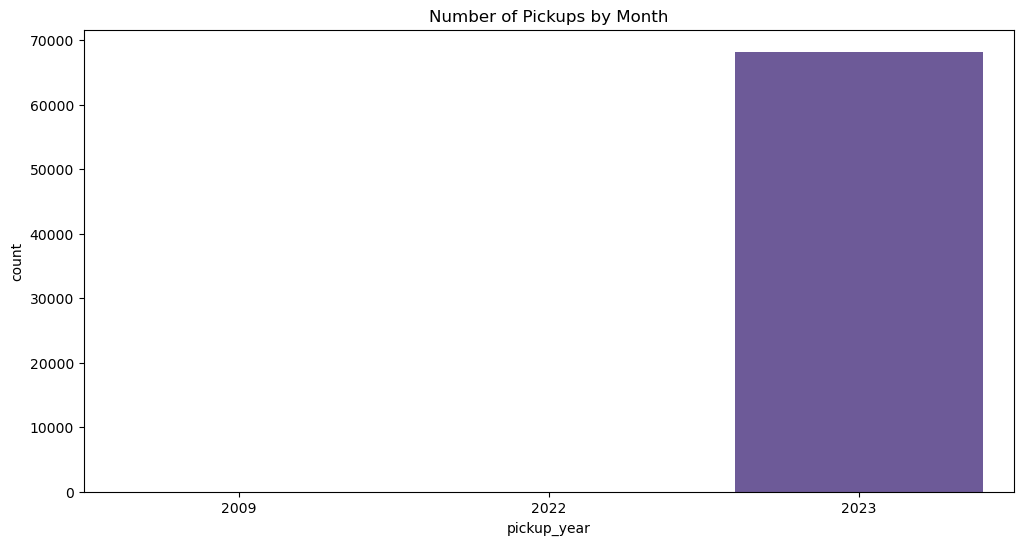

In [39]:
# Monthly pickup trend
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_year', palette='Purples')
plt.title('Number of Pickups by Month')
plt.show()

The data that we have mostly distributed on 2023. So based on this we can mainly take sample data from 2023.

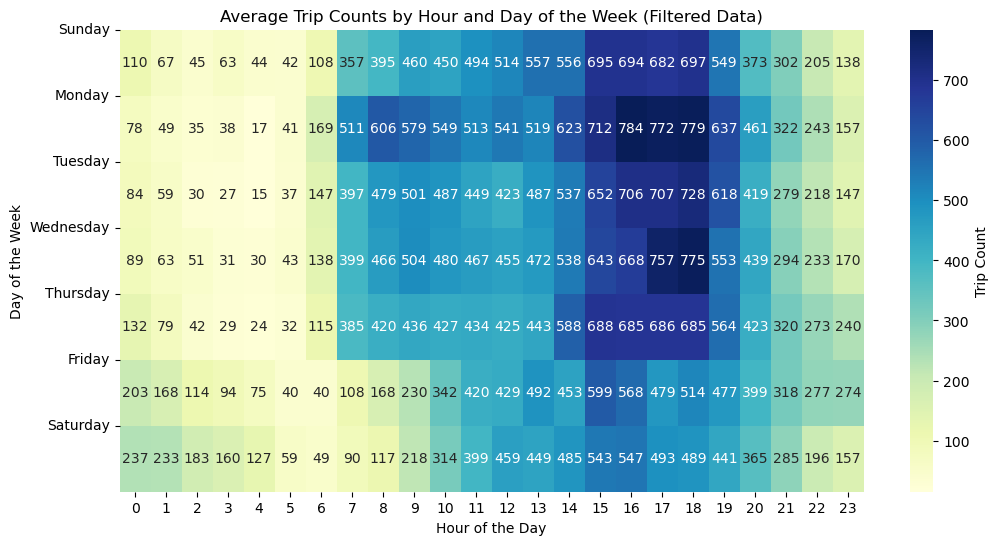

In [29]:
# Group data to get average trip count by hour and day of the week
hourly_day_counts = filtered_df.groupby(['pickup_day', 'pickup_hour']).size().unstack()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_day_counts, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Trip Count'})

# Customize plot
plt.title("Average Trip Counts by Hour and Day of the Week (Filtered Data)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=0)
plt.show()


From the heatmap above we can see that the data has the most bussiest time is on tuesday at 16 - 19 and on thursday 

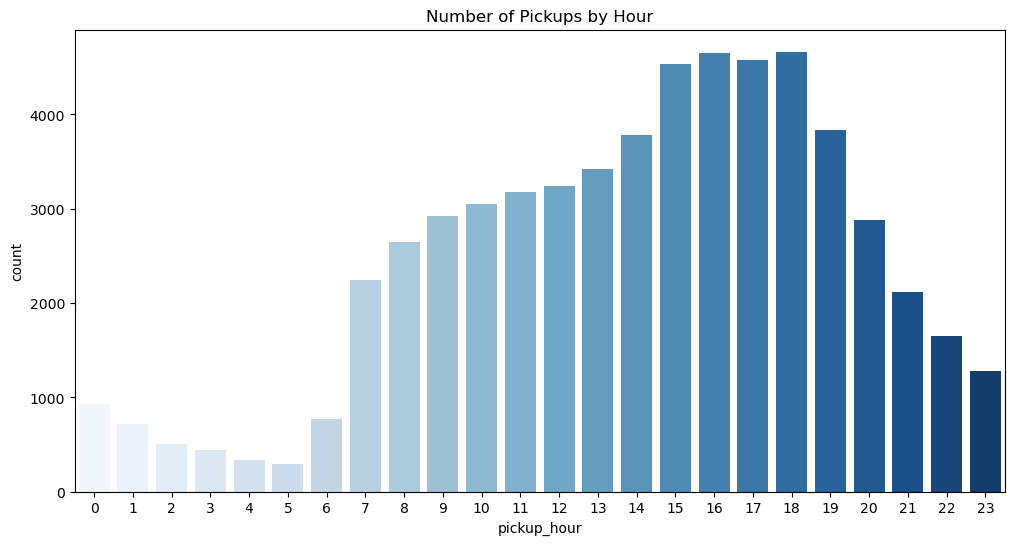

In [32]:
# Plot pickup hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='pickup_hour', palette='Blues')
plt.title('Number of Pickups by Hour')
plt.show()

the heatmap graph above is validated by hourly trips count. The pickup hour data showing that the bussiest time of the taxi is from 14 - 19. Where based on the cummulative of total data is serving more than 4000 trips count. the highest trip counts happen at 16 and 18 oclock

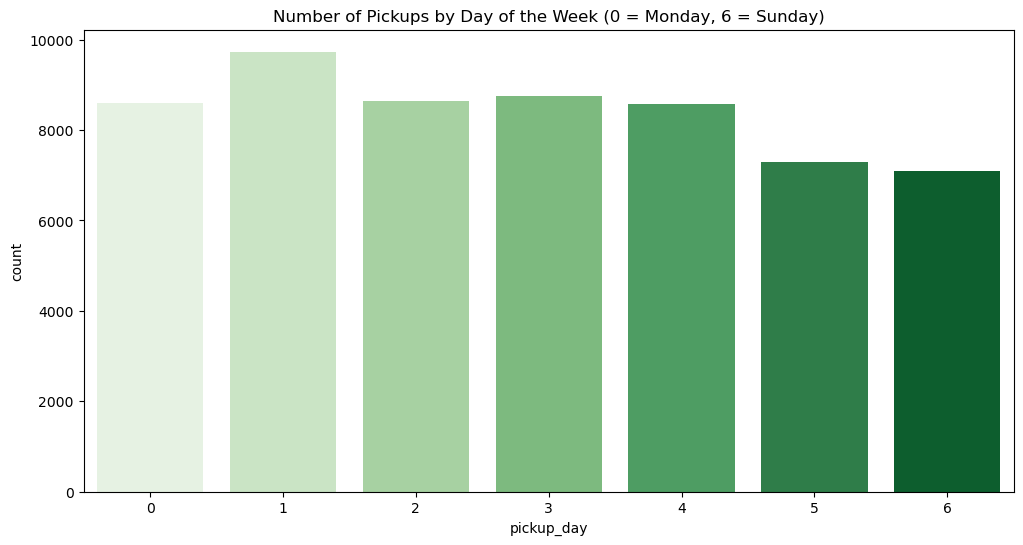

In [35]:
# Plot pickup day distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='pickup_day', palette='Greens')
plt.title('Number of Pickups by Day of the Week (0 = Monday, 6 = Sunday)')
plt.show()

The x value showing the pick up day where 0= monday, 1= Tuesday, 2: Wednesday, 3:Thursday, 4:Friday, 5:Saturday, 6:Sunday. This data saying that the highest demand currently on tuesday, while on saturday and sunday there is smaller demand

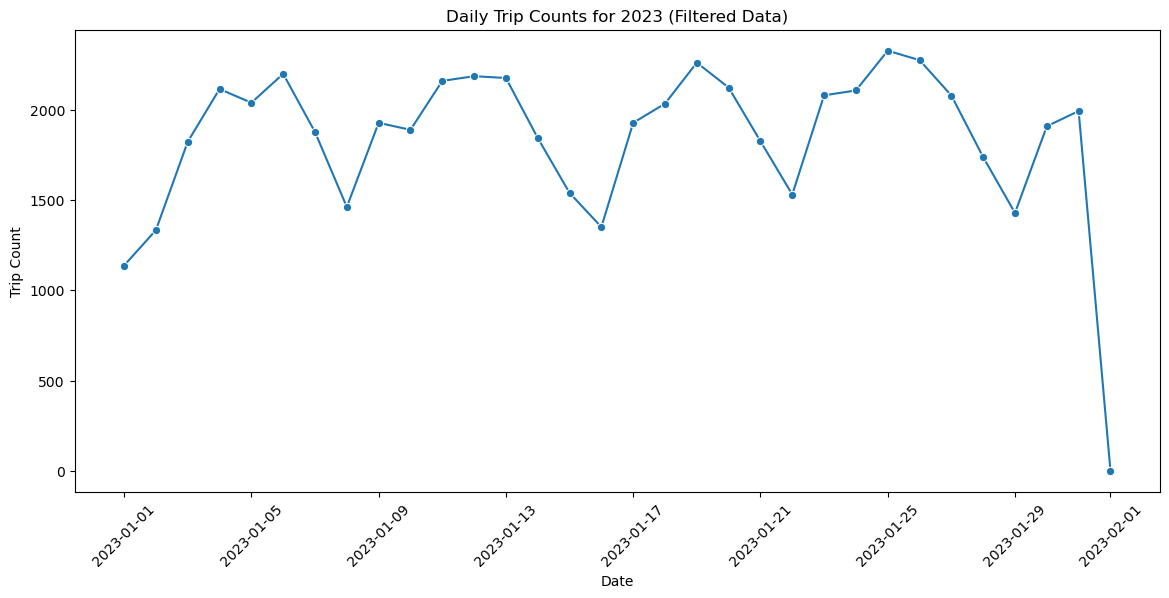

In [36]:
# Filter data for 2023 only
filtered_df_2023 = filtered_df[filtered_df['pickup_year'] == 2023]

# Group data by pickup_date to get daily trip counts
daily_counts_2023 = filtered_df_2023.groupby('pickup_date').size().reset_index(name='trip_count')

# Plot daily trends for 2023
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_counts_2023, x="pickup_date", y="trip_count", marker="o")

# Customize plot
plt.title("Daily Trip Counts for 2023 (Filtered Data)")
plt.xlabel("Date")
plt.ylabel("Trip Count")
plt.xticks(rotation=45)
plt.show()


from the daily count trip we can see that there is also a pattern from trip count where in the beginning of the week there will increase until the middle of the week and reduced again to the weekend 

**Step 1: Analysis**
- By analyzing the data, it was determined that the days of highest demand are Tuesdays and Thursdays. Additionally, the afternoon and evening peak hours fall between 14:00 and 19:00, while the busiest times of day are at 16:00 and 18:00. From this chart the insight is the best time drivers should operate in and maximize their trip counts.
- Demand over the weekends is generally lower for trips, especially compared to mid-week peaks, which is maybe beacuser of fewer commuters and more staying local.

- From the daily demand, there is some pattern that we can see, where demands increased from Monday, reached their peak mid-week, and decrease as the weekend approached. This graph provides a predictable pattern that can lead fleet allocation.

Recommendation : 
- With a predictable patterns in the daily chart, taxi operators should plan fleet availability by increasing the vehicle availability during mid-week and high-demand hours and considering lower fleet requirements on weekends so as to manage costs effectively.
- taxi drivers need to be available in the peak hours, especially mid-week, in order to maximize revenues. To encourage the driver the fleet may be incentivized by operators through surge pricing or bonuses.

**Step 2: Trip Distance and Duration Analysis**
- Trip Distance Distribution
- Plot a histogram of trip_distance to understand common trip lengths and categorize into distance bins (e.g., <3 miles, 3-6 miles).
- Trip Duration Distribution
- histograms for trip_duration tcategory

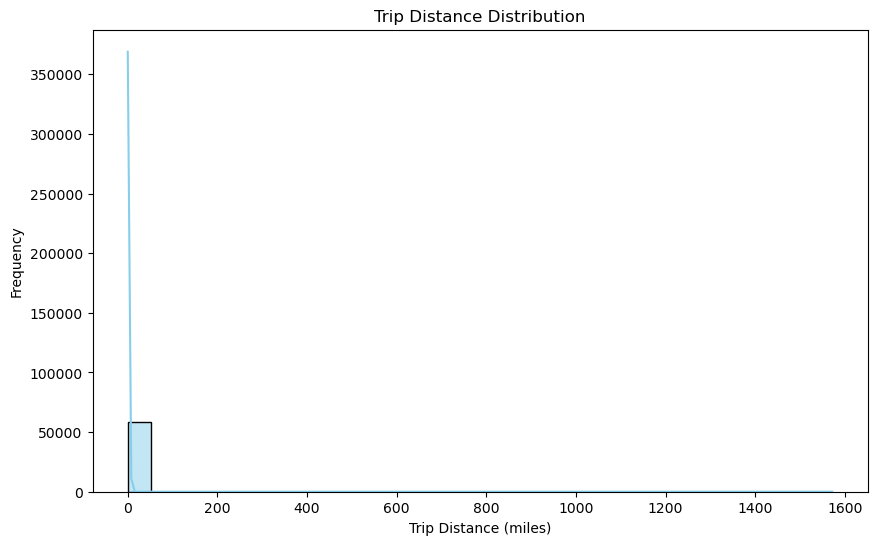

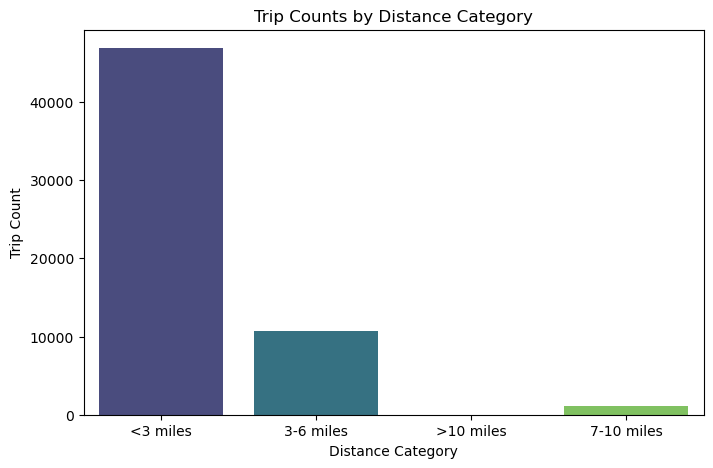

In [37]:
# Plot histogram for trip distance
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['trip_distance'], bins=30, kde=True, color='skyblue')
plt.title("Trip Distance Distribution")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

# Plot count of trips by distance category
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_df, x='distance_category', palette="viridis")
plt.title("Trip Counts by Distance Category")
plt.xlabel("Distance Category")
plt.ylabel("Trip Count")
plt.show()


1. Number of Trips, Based on Distance Interval
Most of the rides are of the category "<3 miles", which shows that most of the taxi rides in New York City are targeted for short distances.

Trips in the category "3-6 miles" are frequent but much less in number with respect to those less than 3 miles.
Only very few trips fall into the categories of "7-10 miles" and ">10 miles"; this reflects that longer-distance trips are relatively rare

Recommendations:
Driver can be encouraged to operate in low distance area. Because most trips are below 3 miles, drivers stand by in the central business district area-to maximize trip frequency.

The taxi services can provide special promotional rates or even tie up with major airports and hotels to attract consumers who make long-distance trips and obviously pay a higher fare per trip. Surge Pricing and Peak Hour Adjustments: Surge pricing for short trips during peak hours can help maximize the revenue since a number of trips are made over short distances.

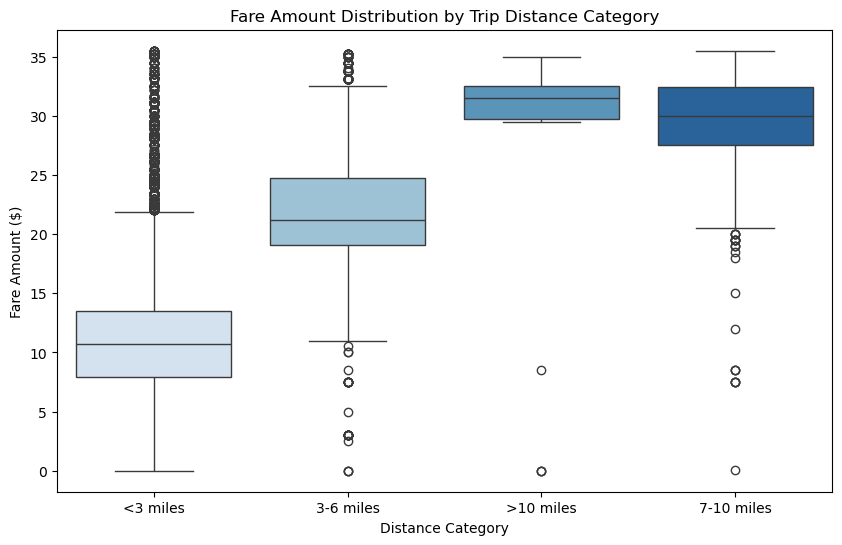

In [ ]:
# Box plot for fare amount by distance category
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='distance_category', y='fare_amount', palette="Blues")

# Customize plot
plt.title("Fare Amount Distribution by Trip Distance Category")
plt.xlabel("Distance Category")
plt.ylabel("Fare Amount ($)")
plt.show()

2. Distribution of Fare Amount vs. Trip Distance Category
<br>

The insights are:
The distribution of fares across distance categories showing that longer the trip distance, higher is the fare amount. 
Trips less than 3 miles have a median fare amount of ~ $10-15 dollars with many outliers, representing very low fares at times.
<br>

The trips that fall between 3-6 miles show medians closer to $20, with fewer extreme outliers.
Trips more than 10 miles and trips between 7-10 miles have medians over $30, but fare variabilities are lower. These categories likely represent longer, more predictable routes, perhaps to and from airports or other fixed destinations.
Recommendations:
<br>
- If we look at this chart only taxis should strategically take in passengers from areas that take longer trip that has possibility high demand for example airports
-  the fare below 3 miles is hugely different, there can be several strategies, such as encouraging surge pricing to ramp up demand during peak hours or decreasing the number of short-distance trips during times of low demand, thus managing revenue.

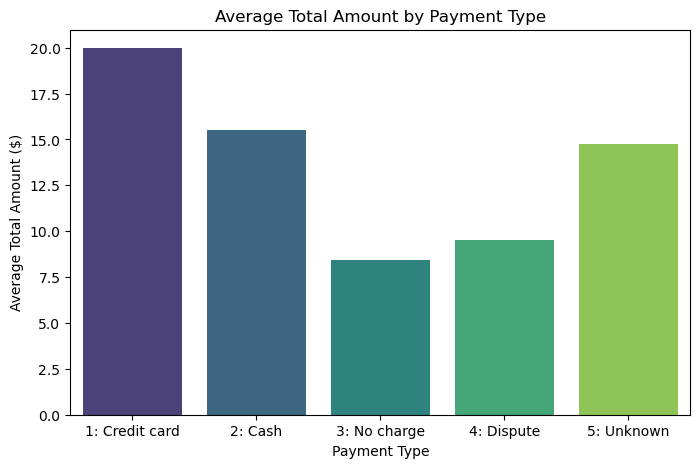

In [41]:
# Calculate the average total amount by payment type
avg_total_by_payment = filtered_df.groupby('payment_type')['total_amount'].mean().reset_index()

# Bar plot for average total amount by payment type
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_total_by_payment, x='payment_type', y='total_amount', palette="viridis")

# Customize plot
plt.title("Average Total Amount by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Average Total Amount ($)")
plt.show()


Insights:

The highest average total amount is associated with credit card payments, followed by cash payments. This suggests that customers paying by credit card tend to have higher fares on average.
"No charge" and "Dispute" payment types have the lowest average total amounts. This is expected, as "No charge" trips are typically promotions or waived fares, and "Dispute" fares might be partially or fully refunded.
The "Unknown" payment type shows a moderately high average total

**Step 3: Location-Based Analysis**
- Popular Pickup and Drop-off Zones
- Bar Plot charts for the most common PULocationID and DOLocationID zones
- Borough-Based Trip Analysis


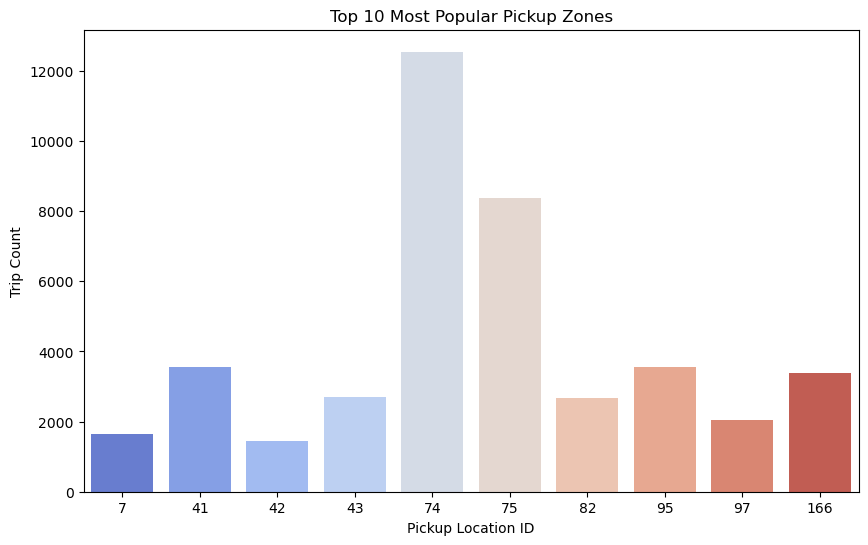

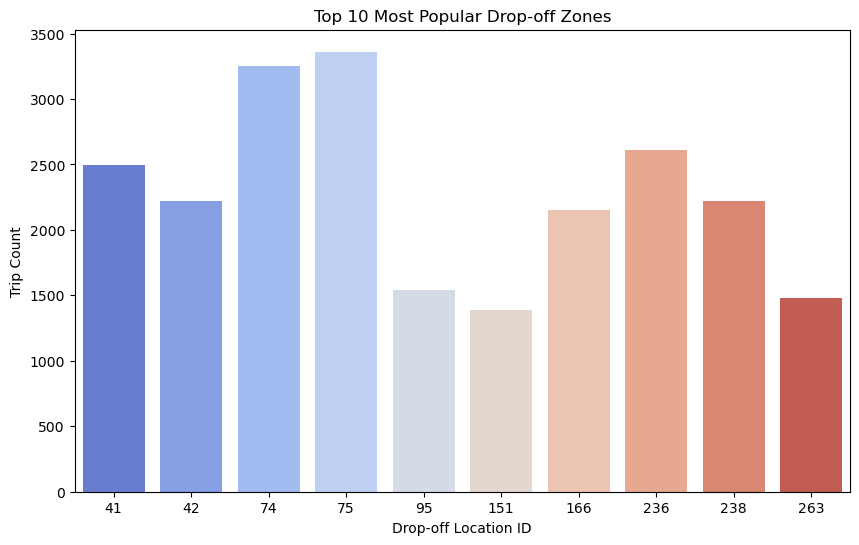

In [42]:
# Top 10 most popular pickup zones
top_pickup_zones = filtered_df['PULocationID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette="coolwarm")
plt.title("Top 10 Most Popular Pickup Zones")
plt.xlabel("Pickup Location ID")
plt.ylabel("Trip Count")
plt.show()

# Top 10 most popular drop-off zones
top_dropoff_zones = filtered_df['DOLocationID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette="coolwarm")
plt.title("Top 10 Most Popular Drop-off Zones")
plt.xlabel("Drop-off Location ID")
plt.ylabel("Trip Count")
plt.show()


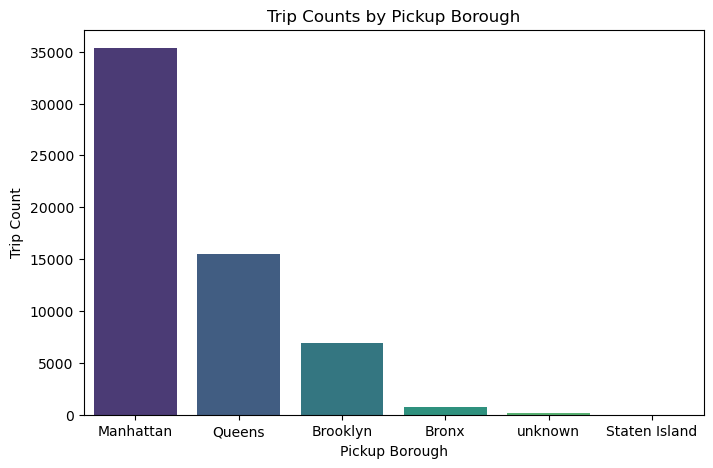

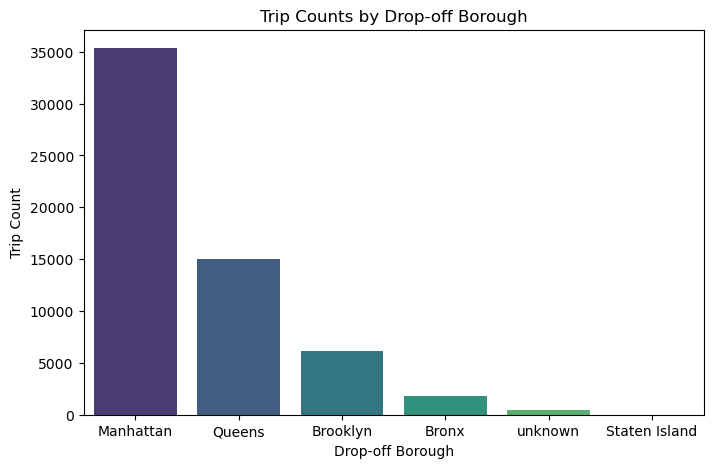

In [43]:
# Trip counts by pickup borough
pickup_borough_counts = filtered_df['PUBorough'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=pickup_borough_counts.index, y=pickup_borough_counts.values, palette="viridis")
plt.title("Trip Counts by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Trip Count")
plt.show()

# Trip counts by drop-off borough
dropoff_borough_counts = filtered_df['DOBorough'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=dropoff_borough_counts.index, y=dropoff_borough_counts.values, palette="viridis")
plt.title("Trip Counts by Drop-off Borough")
plt.xlabel("Drop-off Borough")
plt.ylabel("Trip Count")
plt.show()



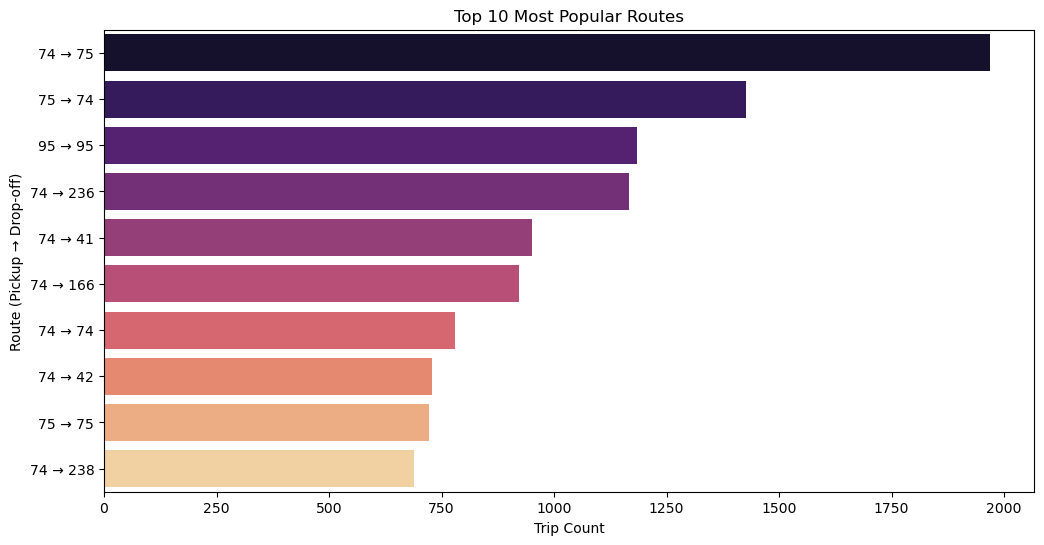

In [44]:
# Create a 'route' column that combines pickup and drop-off locations
filtered_df['route'] = filtered_df['PULocationID'].astype(str) + " → " + filtered_df['DOLocationID'].astype(str)

# Count the most popular routes
top_routes = filtered_df['route'].value_counts().head(10).reset_index()
top_routes.columns = ['route', 'trip_count']

# Plot the most popular routes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='trip_count', y='route', palette="magma")
plt.title("Top 10 Most Popular Routes")
plt.xlabel("Trip Count")
plt.ylabel("Route (Pickup → Drop-off)")
plt.show()


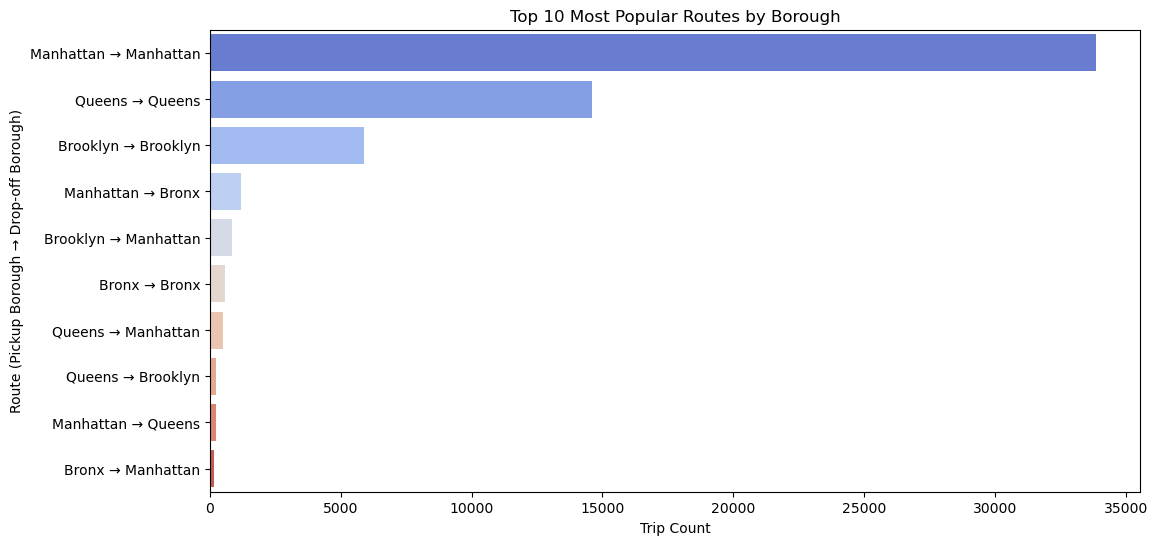

In [45]:
# Create a 'borough_route' column that combines pickup and drop-off boroughs
filtered_df['borough_route'] = filtered_df['PUBorough'] + " → " + filtered_df['DOBorough']

# Count the most popular borough routes
top_borough_routes = filtered_df['borough_route'].value_counts().head(10).reset_index()
top_borough_routes.columns = ['borough_route', 'trip_count']

# Plot the most popular routes by borough
plt.figure(figsize=(12, 6))
sns.barplot(data=top_borough_routes, x='trip_count', y='borough_route', palette="coolwarm")
plt.title("Top 10 Most Popular Routes by Borough")
plt.xlabel("Trip Count")
plt.ylabel("Route (Pickup Borough → Drop-off Borough)")
plt.show()


The highest demand location of the taxi shows within Manhatten Area for pick up and drop off
The second highest is Queens Area

Step 4: High-Demand Analysis
- High-Demand Period Identification
-  line plot showing trip counts over time with an overlay for high-demand periods (e.g., weekends or peak hours).
Compare trip counts and average fare on weekends vs. weekdays to identify differences in demand and revenue.

In [50]:
# Ensure 'pickup_date' is in datetime format if it’s not already
filtered_df['pickup_date'] = pd.to_datetime(filtered_df['pickup_date'])

# Filter for the year 2023
filtered_2023_df = filtered_df[filtered_df['pickup_date'].dt.year == 2023]

# Print the shape of the new DataFrame to verify filtering
print(filtered_2023_df.shape)


(58671, 44)


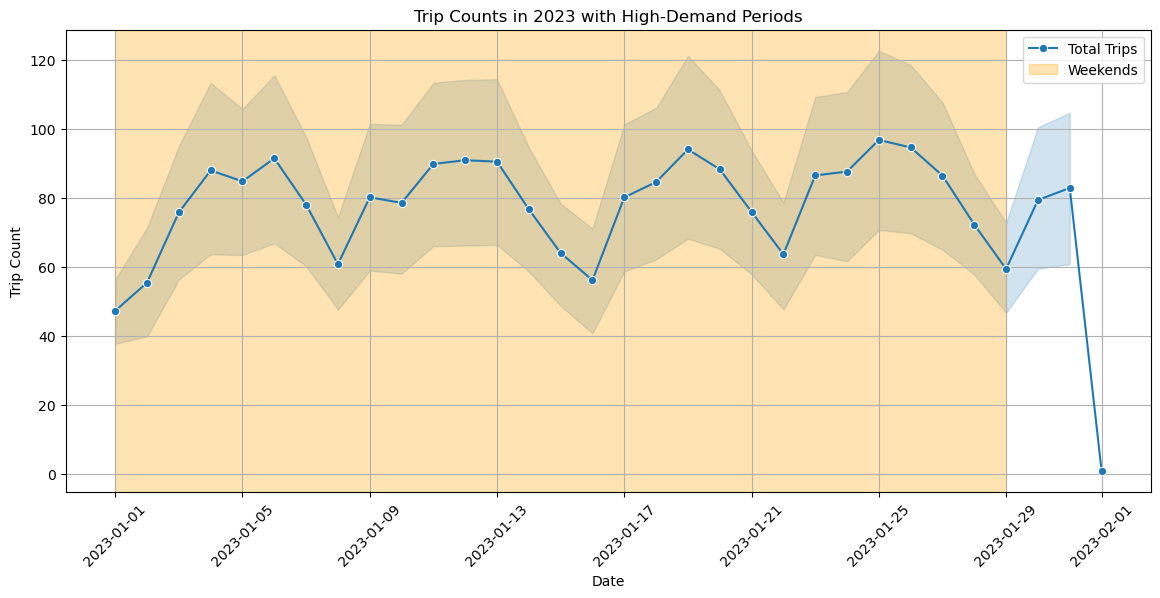

In [51]:
# Count trips by date and hour for 2023
trip_counts_by_time = filtered_2023_df.groupby(['pickup_date', 'pickup_hour']).size().reset_index(name='trip_count')

# Create a line plot for trip counts over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=trip_counts_by_time, x='pickup_date', y='trip_count', marker='o', label='Total Trips')
plt.title("Trip Counts in 2023 with High-Demand Periods")
plt.xlabel("Date")
plt.ylabel("Trip Count")
plt.xticks(rotation=45)
plt.grid()

# Highlight high-demand periods (e.g., weekends)
weekend_dates = filtered_2023_df[filtered_2023_df['is_weekend'] == 1]['pickup_date'].unique()
if len(weekend_dates) > 0:
    plt.axvspan(weekend_dates[0], weekend_dates[-1], color='orange', alpha=0.3, label='Weekends')

plt.legend()
plt.show()



In [52]:
# Calculate trip counts and average fare for weekends and weekdays
weekend_weekday_comparison = filtered_df.groupby('is_weekend').agg(
    trip_count=('total_amount', 'count'),
    avg_fare=('fare_amount', 'mean')
).reset_index()

# Map boolean to descriptive labels
weekend_weekday_comparison['is_weekend'] = weekend_weekday_comparison['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})


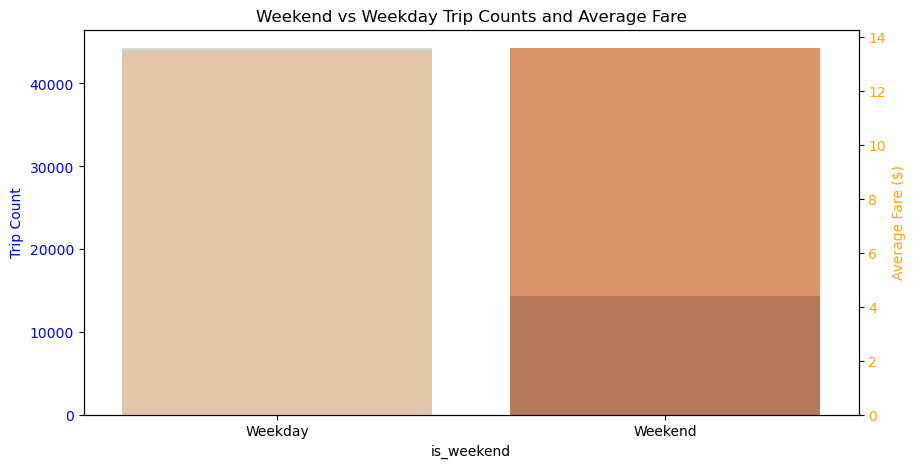

In [53]:
# Set up the figure for the plots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for trip counts
sns.barplot(data=weekend_weekday_comparison, x='is_weekend', y='trip_count', ax=ax1, palette="Blues", alpha=0.7)
ax1.set_ylabel("Trip Count", color='blue')
ax1.set_title("Weekend vs Weekday Trip Counts and Average Fare")
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for average fare
ax2 = ax1.twinx()
sns.barplot(data=weekend_weekday_comparison, x='is_weekend', y='avg_fare', ax=ax2, palette="Oranges", alpha=0.7)
ax2.set_ylabel("Average Fare ($)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()


The days of highest demand are Tuesdays(1) and Thursdays(3). The afternoon and evening peak hours fall between 14:00 and 19:00, while the busiest times of day are at 16:00 and 18:00
Demand over the weekends is generally lower for trips, especially compared to mid-week peaks, which is maybe beacuser of fewer commuters and more staying local.
From the daily demand at prev dashboard, the demands increased from Monday, reached their peak mid-week, and decrease as the weekend approached. 


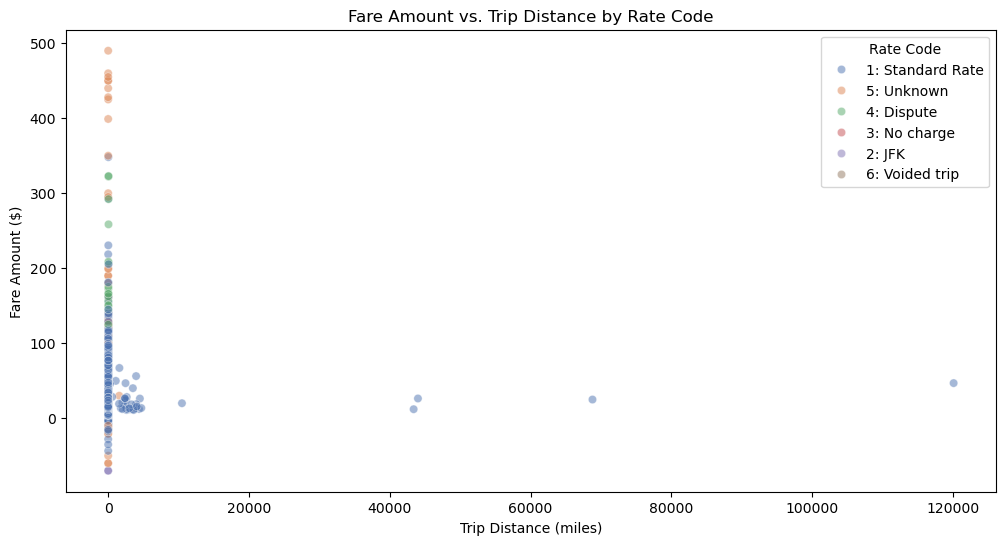

In [55]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='RatecodeID', palette='deep', alpha=0.5)
plt.title('Fare Amount vs. Trip Distance by Rate Code')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend(title='Rate Code')
plt.show()

In [59]:
# Calculate trip duration in minutes
filtered_df['trip_duration'] = (filtered_df['lpep_dropoff_datetime'] - filtered_df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Group by pickup and dropoff zones and calculate average trip duration
longest_trip_zones = (
    filtered_df.groupby(['PULocationID', 'DOLocationID'])['trip_duration']
    .mean()
    .reset_index()
    .sort_values(by='trip_duration', ascending=False)
    .head(10)  # Show top 10 longest trip pairs
)

print("Top 10 Pickup and Drop-off Zones with Longest Trip Duration:")
print(longest_trip_zones)

Top 10 Pickup and Drop-off Zones with Longest Trip Duration:
      PULocationID  DOLocationID  trip_duration
486             36           137    1423.216667
2596           167            60    1386.766667
3587           255           239    1369.216667
1981           116           161    1368.483333
2730           179           114    1357.116667
156             17           256    1282.833333
1057            65           178     886.066667
3329           236           243     726.600000
530             40            40     718.716667
3019           200           244     674.283333


In [60]:
#melakukan payment analysis

payment_analysis = (
    filtered_df.groupby('payment_type')
    .agg(
        # Total income from each payment type
        total_income=('total_amount', 'sum'),   
        # Average income per trip
        avg_income_per_trip=('total_amount', 'mean'), 
        # Average tip per trip
        total_tip=('tip_amount', 'sum'),  # Total tips
         # Total number of trips
        avg_tip_per_trip=('tip_amount', 'mean'),  
        trip_count=('payment_type', 'size') 
    )
    .reset_index()
    .sort_values(by='trip_count', ascending=False)  # Sort by trip count
)

# Map payment_type codes to meaningful names
payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
payment_analysis['payment_type'] = payment_analysis['payment_type'].map(payment_type_mapping)

print("Payment Method Analysis:")
print(payment_analysis)

Payment Method Analysis:
  payment_type  total_income  avg_income_per_trip  total_tip  \
0          NaN     746576.28            19.982235  105627.79   
1          NaN     324221.90            15.489294       5.00   
2          NaN       2679.40             8.452366       4.65   
3          NaN        582.30             9.545902      10.50   
4          NaN         29.50            14.750000       0.00   

   avg_tip_per_trip  trip_count  
0          2.827145       37362  
1          0.000239       20932  
2          0.014669         317  
3          0.172131          61  
4          0.000000           2  


In [ ]:

df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Group by VendorID 
vendor_performance = (
    df.groupby('VendorID')
    .agg(
        avg_trip_duration=('trip_duration', 'mean'),
        avg_trip_distance=('trip_distance', 'mean'),
        total_trips=('VendorID', 'size'),
        avg_fare_amount=('fare_amount', 'mean'),
        avg_tip_amount=('tip_amount', 'mean')
    )
    .reset_index()
)

print("Vendor Performance Comparison:")
print(vendor_performance)

Vendor Performance Comparison:
                             VendorID  avg_trip_duration  avg_trip_distance  \
0  1: CreativeMobileTechnologies,LLC.          15.589420           2.236733   
1                     2: VeriFoneInc.          18.495294           9.047774   

   total_trips  avg_fare_amount  avg_tip_amount  
0         9343        16.376213        1.665342  
1        58868        16.639626        2.214189  


**Step 5 User Preference Plot**

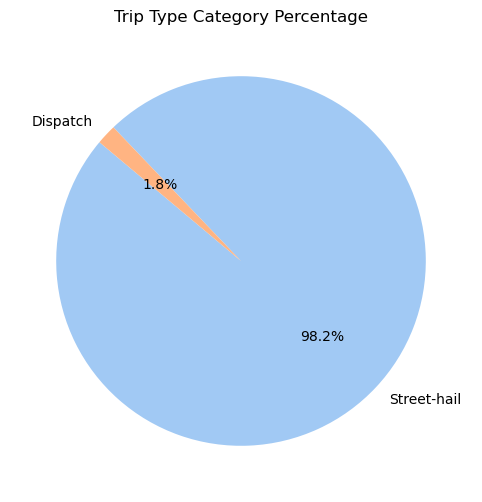

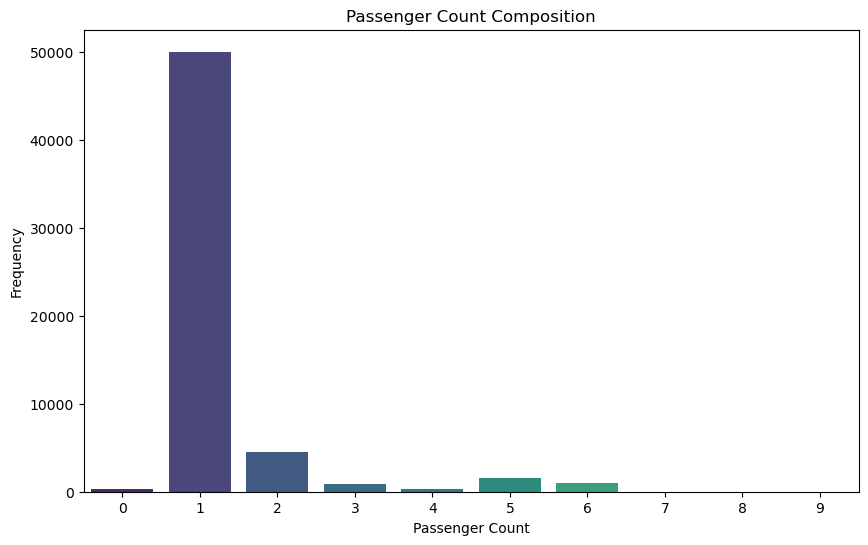

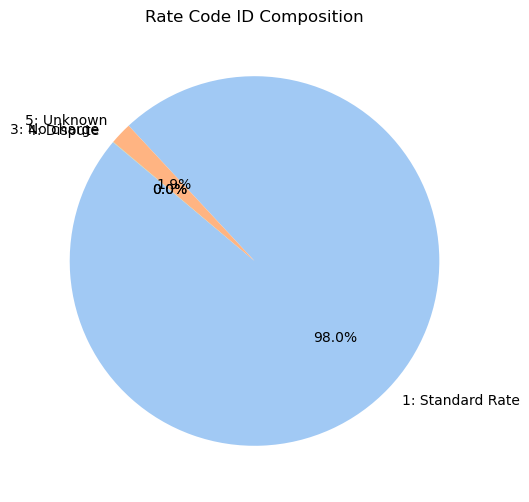

In [62]:
# Define colors for consistent styling
colors = sns.color_palette('pastel')

# 1. Trip Type Category Percentage (Pie Chart)
trip_type_counts = filtered_df['trip_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(trip_type_counts, labels=trip_type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Trip Type Category Percentage")
plt.show()

# 2. Passenger Count Composition (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='passenger_count', palette="viridis")
plt.title("Passenger Count Composition")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()

# 3. Rate Code ID Composition (Pie Chart)
rate_code_counts = filtered_df['RatecodeID'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rate_code_counts, labels=rate_code_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Rate Code ID Composition")
plt.show()

More than 90% of the trip happen for the category of street hail which means that there are incidental taxi trip by user

About 90% of the trip The pessenger is alone

More than 90% The ratecodeID that applied to the trip mostly is standard ratecode which means the area oh the trip is not surcharge and there are very minimum demand with the surcharge trip

---
# **Statistic: Hypothesis and Correlation Test**
 

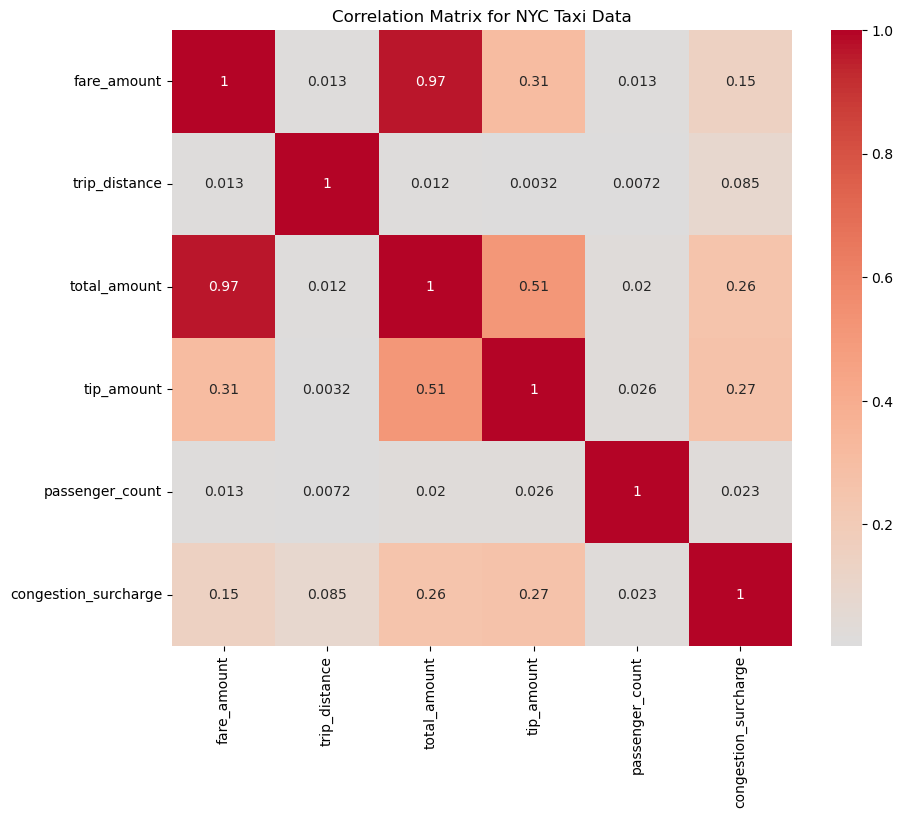

In [ ]:
# Select relevant numerical columns for correlation analysis
numerical_cols = ['fare_amount', 'trip_distance', 'total_amount', 'tip_amount', 'passenger_count', 'congestion_surcharge']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for NYC Taxi Data')
plt.show()

Test 1: Difference in Average Fare by Payment Type
This test will check if payment type impacts the average fare amount.

In [ ]:
from scipy import stats

# Filter dataset for valid payment types
data_filtered = df[df['payment_type'].isin([1, 2])]  

# Extract fare amounts by payment type
fare_credit = data_filtered[data_filtered['payment_type'] == 1]['fare_amount']
fare_cash = data_filtered[data_filtered['payment_type'] == 2]['fare_amount']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(fare_credit, fare_cash)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in average fare by payment type.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average fare by payment type.")

ANOVA F-statistic: 38.317341404464365
ANOVA p-value: 6.04934851031627e-10
Reject the null hypothesis: Significant difference in average fare by payment type.


Test 2: Impact of Trip Distance on Tip Amount

In [ ]:
# Use Pearson correlation test
correlation, p_value = stats.pearsonr(df['trip_distance'], df['tip_amount'])
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation between trip distance and tip amount.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between trip distance and tip amount.")

Correlation coefficient: 0.003216151340618096
p-value: 0.40093271811946296
Fail to reject the null hypothesis: No significant correlation between trip distance and tip amount.


Test 3: Do High-Volume Zones Generate Higher Total Revenue?
This test will check if there’s a significant difference in total revenue for trips originating in high-demand zones versus low-demand zones.

In [ ]:
# Define high-demand zones (top 10% by trip count)
top_zones = df['PULocationID'].value_counts().head(int(len(df) * 0.1)).index
df['is_high_demand'] = df['PULocationID'].apply(lambda x: 1 if x in top_zones else 0)

# Separate data into high-demand and low-demand zone trips
high_demand_fares = df[df['is_high_demand'] == 1]['total_amount']
low_demand_fares = df[df['is_high_demand'] == 0]['total_amount']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_demand_fares, low_demand_fares, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: High-demand zones have significantly different total revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total revenue between high and low-demand zones.")

t-statistic: nan
p-value: nan
Fail to reject the null hypothesis: No significant difference in total revenue between high and low-demand zones.


3. Statistical Inference and Confidence Intervals
For added robustness, calculate confidence intervals for mean fare or revenue in high-demand vs. low-demand zones.


In [ ]:
# Calculate 95% confidence interval for high-demand zones
high_demand_mean = high_demand_fares.mean()
high_demand_std = high_demand_fares.std()
high_demand_n = len(high_demand_fares)
high_demand_conf_interval = stats.norm.interval(0.95, loc=high_demand_mean, scale=high_demand_std / np.sqrt(high_demand_n))

print("95% Confidence Interval for High-Demand Zone Revenue:", high_demand_conf_interval)

95% Confidence Interval for High-Demand Zone Revenue: (21.673379690258503, 21.905375056043408)


---
# **Recommendation**

Focusing on High demand location


Drivers should prioritize these Manhattan (especially areas like East Harlem and North/Central Harlem) has the highest demand for taxi pickups and drop-offs, followed by Queens, particularly on Tuesdays and Thursdays, which show the highest mid-week demand, and focus on peak hours between 14:00 and 19:00 (especially 16:00 and 18:00).

Optimize Fleet for Street Hail Demand


Over 90% of trips are street hails. So, drivers should station themselves in busy areas with high pedestrian traffic, such as commercial districts, tourist sites, and transit hubs. Fleet operators might consider focusing less on app-based or pre-booked systems and more on maintaining visibility in high-traffic zones.


Prioritize Solo Passenger Service

About 90% of the rides are single passengers. In such a case, the operators need to right-size their fleet with standard, fuel-efficient vehicles rather than larger, group-type vehicles. This would bring down fuel costs and make drivers more productive, concentrating on picking up single passengers and quick turnarounds.

Capitalize on Standard Rate Trips:

More than 90% of trips are charged at the standard rate (RatecodeID), indicating minimal demand for surcharge zones or long-distance travel. Drivers should focus on high-density areas with regular ratecode trips but drivers can be informed of areas where surcharge rates apply to take advantage of those fares.

Leverage Weekly Demand Patterns:

Demand shows a pattern of increasing from Monday, peaking mid-week, and decreasing toward the weekend, with weekend demand generally lower. This scheduling adjustment to facilitate the demand pattern. It can help balance supply and demand and make sure drivers are available when demand is highest.


Consider Promotion for Non-Standard Trips

There’s minimal demand for trips requiring surcharges. To encourage trips to or from surcharge zones (like airports), operators could consider offering promotion to passenger or special rates to drivers who take these longer trips, especially during lower-demand times
